# Notebook activity 4.2 A parallel slopes model for the wages data

In this notebook, we will use R to fit a parallel slopes model using data from the wages dataset (first introduced in Subsection 1.1, Unit 3). In this notebook we will consider just three of the variables from that dataset:

* `hourlyWageSqrt`: the square root of the individual's hourly wage (in £) 
* `educAge`: the age, in years, at which the individual ceased education
* `gender`: the gender the individual identifies with, taking the values male (level 1) and female (level 2).

We'll take `hourlyWageSqrt` as the reponse variable and fit a parallel slopes model using the covariate `educAge` and the factor `gender` as explanatory variables.

The data are stored in the data frame `wages`.

## (a) Getting started

### (i)

Start by loading the `M348` package and the `wages` data frame, then checking that `wages` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(wages)
# Check the data frame has loaded OK
head(wages)

### (ii)

Check that `gender` is a factor and that level 1 of `gender` is male.

In [ ]:
class(wages$gender)
levels(wages$gender)

## (b) Fitting a parallel slopes model

### (i)

Use the empty code cell below to fit a parallel slopes model for the response variable `hourlyWageSqrt` using the covariate `educAge` and the factor `gender` as explanatory variables. Store the results in the object `wageParallelFit` and produce a summary of the results.

#### Solution <a class="tocSkip">

The code and resulting output are given below.

In [3]:
wageParallelFit <- lm(hourlyWageSqrt ~ gender + educAge, data = wages)
summary(wageParallelFit)


Call:
lm(formula = hourlyWageSqrt ~ gender + educAge, data = wages)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8893 -0.6263 -0.0509  0.6067  3.5183 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.121905   0.066118   47.22   <2e-16 ***
genderfemale -0.612092   0.043776  -13.98   <2e-16 ***
educAge       0.039853   0.003517   11.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.007 on 3328 degrees of freedom
Multiple R-squared:  0.08375,	Adjusted R-squared:  0.0832 
F-statistic: 152.1 on 2 and 3328 DF,  p-value: < 2.2e-16


### (ii)

Does the output you produced in part (i) suggest that `educAge` should be included in the model after controlling for `gender`? Why or why not?

#### Solution <a class="tocSkip">

In the `Coefficients` table, the $p$-value associated with the covariate `educAge` is very small (<2e-16), which suggests that `educAge` *should* be included in the model after controlling for `gender`.

### (iii)

In the empty code cell below, fit the model  `hourlyWageSqrt` ~ `educAge`, storing the results in the object `wageSLRFit`.

Then, in the same code cell, use the `anova()` function to test whether the factor `gender` should be included in the model in addition to `educAge`. 

#### Solution <a class="tocSkip">

The code and resulting output are given below.

In [4]:
# Fit the model hourlyWageSqrt ~ educAge
wageSLRFit<- lm(hourlyWageSqrt ~ educAge, data = wages)
# Test whether the gender should be included in the model
#    in addition to educAge
anova(wageSLRFit, wageParallelFit)

Res.Df RSS      Df Sum of Sq F       Pr(>F)      
1 3329   3573.812 NA       NA       NA           NA
2 3328   3375.511  1 198.3002  195.509 3.254779e-43

### (iv)

What do you conclude from the output you obtained in part (iii)?

#### Solution <a class="tocSkip">

The $p$-value given for `Pr(>F)` is extremely small (3.254779e-43), and so there is very strong evidence to suggest that `gender` *should* be included in the model in addition to `educAge`.

## (c) Checking assumptions

### (i) 

Use the empty code cell below to produce the residual plot and the normal probability plot for the model you fitted in part (b)(i). 

#### Solution <a class="tocSkip">

The code and resulting output are given below.

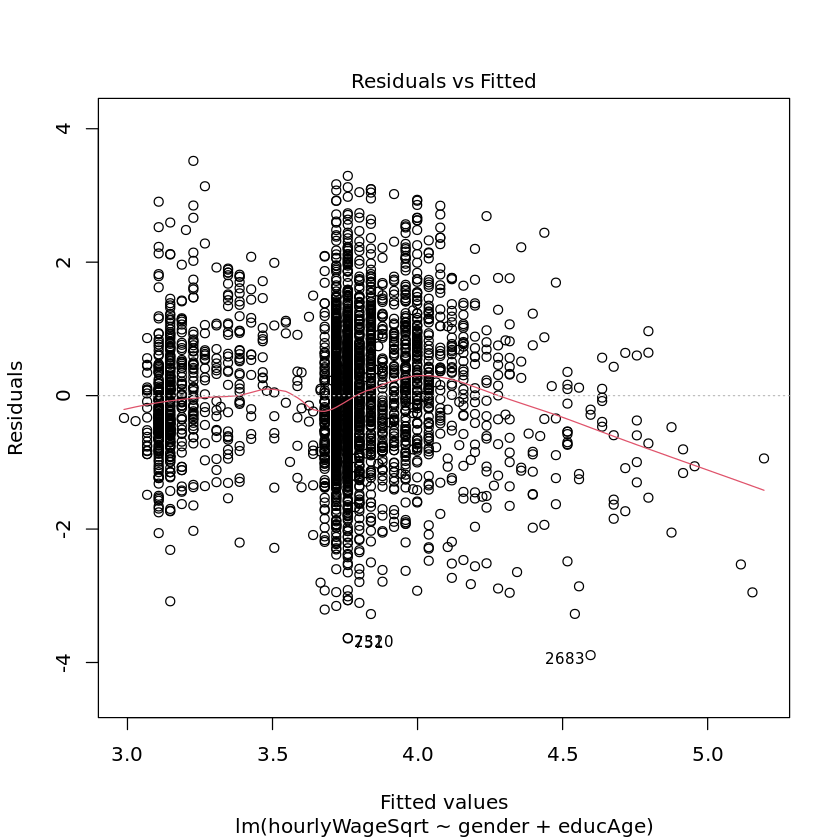

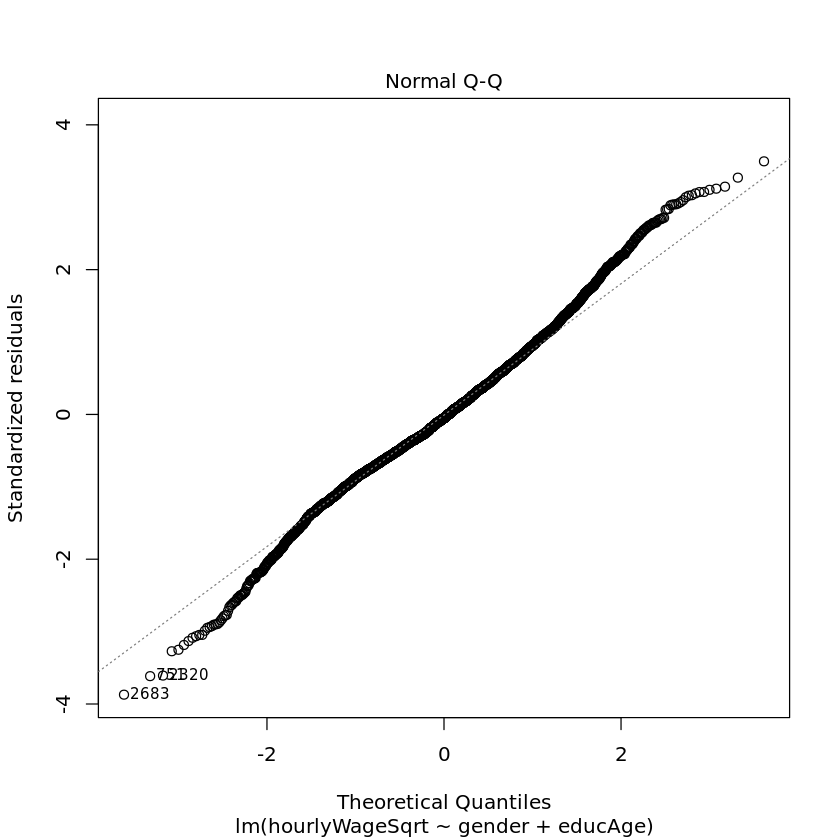

In [5]:
# Residual plot
plot(wageParallelFit, 1)
# normal probability plot
plot(wageParallelFit, 2)

### (ii)

Do either of the plots you produced in part (c)(i) suggest any problems with the assumptions of the parallel slopes model for these data? Why or why not?

#### Solution <a class="tocSkip">

In the residual plot, there seems to be a slight decrease in the residuals for the larger fitted values. From the residual plot, it also looks as if the variance may vary slightly for the different fitted values. The majority of the residuals are, however, generally fairly randomly scattered about zero, and so, overall the assumption that the random terms have zero mean and constant variance seems reasonable. 

The majority of the points in the normal probability plot lie along the straight line, which is consistent with the assumption that the random terms are normally distributed. At the ends of the plot, however, the points systematically deviate slightly from the line, suggesting that the normality assumption may be questionable. The deviation is not too drastic though, and the majority of points lie close to the line, so, overall,  we (the module team) wouldn't rule out the normality assumption.